In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Zadanie 1

In [90]:
def distp(X, C):
    d_e = np.sqrt(np.sum((X - C) ** 2, axis=1))
    return d_e

In [91]:
def distm(X, C, V):
    d_m = np.sqrt(np.sum(np.dot((X - C), V) * (X - C), axis=1))

    return d_m

In [92]:
def kmeans(X, k, distance_metric='euclidean'):

    assert distance_metric in ['euclidean', 'mahalanobis'], "Zły typ odległości"
    assert isinstance(k, int) and k >= 1, "Podano złe k"
    assert isinstance(X, np.ndarray)
    
    n, m = X.shape
    K = k


    centroids = X[np.random.choice(a=n, size=K, replace=False)]
    _centroids_old = np.empty_like(centroids)
    labels = np.empty(n)


    V = None
    if distance_metric == 'mahalanobis':
        V = np.cov(X.T)


    distances = np.empty((K, n))
    d = 1
    while not np.array_equal(centroids, _centroids_old):
        
        _centroids_old = centroids.copy()

        for j in range(K):
            if distance_metric == 'euclidean':
                distances[j] = distp(X, centroids[j, :])
            elif distance_metric == 'mahalanobis':
                distances[j] = distm(X, centroids[j, :], V)

        labels = np.argmin(distances, axis=0)

        for j in range(k):
            if np.sum(labels == j) != 0:
                centroids[j] = np.mean(X[labels == j], axis=0)

    return centroids, labels

Zadanie 2

In [93]:
X = pd.read_csv("autos.csv")[['wheel-base', 'length']].to_numpy()

In [94]:
c, l = kmeans(X, 5, 'mahalanobis')
# c, l = kmeans(X, 5, 'euclidean')

Zadanie 3

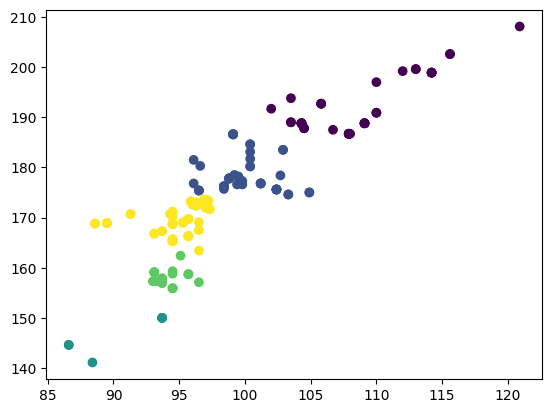

In [95]:
plt.scatter(X[:, 0], X[:, 1], c=l);

In [96]:
# to do 4 chyba ale nw
    # sse = np.zeros(k)
    # for j in range(k):
    #     sse[j] = np.sum((X[labels == j] - centroids[j])**2)

    # # obliczenie łącznego SSE
    # total_sse = np.sum(sse)